In [1]:
Project = '/Users/daehwa/Library/CloudStorage/OneDrive-Personal/Junlab/Projects/Adipocyte'

import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

plt.rcParams.update(plt.rcParamsDefault)

mpl.rcParams['font.sans-serif'] = "Arial"
mpl.rcParams['font.family'] = "sans-serif"

plt.rcParams['ps.useafm']=True
plt.rcParams['pdf.fonttype']=42

plt.rc('font', size=7)          # controls default text sizes
plt.rc('axes', titlesize=7)     # fontsize of the axes title
plt.rc('axes', labelsize=7)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=6)    # fontsize of the tick labels
plt.rc('ytick', labelsize=6)    # fontsize of the tick labels
plt.rc('legend', fontsize=6)    # legend fontsize
suptitlesize = 7

plt.rc('axes', axisbelow=True) #push axes to back
mpl.rcParams['axes.linewidth'] = 0.5

In [2]:
stalling_score_dict = {}

paths = {
    'Ours' : f'{Project}/Results/Tables/Ribosome_stalling/v20230730/adi_stall-score.df.pickle'
}

for dataset in paths:
    with open(paths[dataset],"rb") as fr: stalling_score_dict[dataset] = pickle.load(fr)
    stalling_score_dict[dataset]['AA_codon'] = stalling_score_dict[dataset]['aa-asite']+' '+stalling_score_dict[dataset]['codon-asite']
    stalling_score_dict[dataset] = stalling_score_dict[dataset].replace(0, np.nan).dropna()

    display(stalling_score_dict[dataset])

,transcript_id,asite,reltostart-asite,codon-asite,aa-asite,D0a,D0b,D0c,D4a,D4b,D4c,D8a,D8b,D8c,AA_codon
6,ENSMUST00000000001.5,195,54,AUC,I,1.876404,1.591739,5.703044,2.955752,0.824691,1.796907,3.290640,1.739583,2.312308,I AUC
7,ENSMUST00000000001.5,198,57,GAC,D,1.876404,1.591739,0.991834,0.268705,1.237037,0.673840,0.658128,1.159722,0.770769,D GAC
9,ENSMUST00000000001.5,204,63,AAC,N,3.987360,1.326450,4.711210,5.642800,0.824691,2.470746,0.658128,0.579861,1.027692,N AAC
10,ENSMUST00000000001.5,213,72,GAG,E,3.049157,2.652899,3.471418,2.149638,2.474074,2.695360,1.974384,2.899306,1.798462,E GAG
13,ENSMUST00000000001.5,228,87,GCG,A,1.641854,1.326450,4.711210,0.806114,0.824691,2.695360,2.303448,2.899306,5.652308,A GCG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1024950,ENSMUST00000239525.1,10109,9978,GAG,E,7.105894,12.158446,6.512629,5.410881,3.658754,4.345818,3.622268,7.712703,1.497849,E GAG
1024957,ENSMUST00000239525.1,10139,10008,GAG,E,15.544144,9.210944,7.598067,13.527202,9.146886,14.775780,5.433403,5.141802,1.497849,E GAG
1024966,ENSMUST00000239525.1,10184,10053,AAA,K,2.664710,2.210627,3.527674,13.527202,8.232198,5.214981,16.300208,10.283604,23.965577,K AAA
1025016,ENSMUST00000239525.1,10442,10311,GAG,E,1.776474,2.579064,0.542719,3.607254,0.304896,0.869164,3.622268,10.283604,1.497849,E GAG


In [3]:
plot_data_dict = {}

Cond_groups = {
    'Ours' : ['D0','D4','D8']
}

for dataset in Cond_groups:
    tmp_df = pd.DataFrame(columns=list(set(stalling_score_dict[dataset]['AA_codon'])))

    for SP in stalling_score_dict[dataset].iloc[:,5:-1]:
        tmp = stalling_score_dict[dataset].sort_values(SP, ascending=False)[:(len(stalling_score_dict[dataset])//100)*5]
        tmp_df = pd.concat([tmp_df, pd.DataFrame(tmp.value_counts('AA_codon')).T.rename(index={0:SP})])

    tmp_df = tmp_df.drop(columns=[colname for colname in tmp_df.columns if colname.startswith('*')]).T.replace(np.nan,0).sort_index()

    for Cd in Cond_groups[dataset]:
        tmp_df[Cd] = tmp_df[[colname for colname in tmp_df.columns if colname.startswith(Cd)]].mean(axis=1)
    tmp_df = tmp_df[Cond_groups[dataset]]

    # for col in tmp_df:
    #     tmp_df[col] = tmp_df[col] / sum(tmp_df[col]) * 100

    tmp_df = tmp_df.reset_index()
    tmp_df['IDX'] = 'Else'
    for i in ['E GAA','E GAG','D GAC','D GAU']:
        tmp_df.loc[tmp_df['index']==i,'IDX'] = i
    tmp_df = tmp_df.drop(columns='index')

    tmp_df['IDX'] = pd.Categorical(tmp_df['IDX'], categories=['E GAA','E GAG','D GAC','D GAU','Else'])
    tmp_df = tmp_df.sort_values('IDX')

    tmp_df = tmp_df.rename(columns={'D0':'0d', 'D4':'4d', 'D8':'8d'})

    display(tmp_df)
    plot_data_dict[dataset] = tmp_df

,0d,4d,8d,IDX
8,1505.000000,3348.666667,4331.333333,E GAA
9,1511.666667,1658.333333,1873.666667,E GAG
6,1302.333333,1304.333333,1418.333333,D GAC
7,974.000000,907.000000,1034.000000,D GAU
43,56.666667,47.333333,44.000000,Else
...,...,...,...,...
27,115.666667,118.333333,97.333333,Else
28,295.666667,212.333333,193.666667,Else
29,295.333333,244.666667,171.666667,Else
31,250.000000,224.333333,265.333333,Else


# Plot

/var/folders/ct/z73cq4_j2g5612tltg_pmxxc0000gn/T/ipykernel_72049/556618401.py:30: UserWarning: 
The palette list has fewer values (2) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.swarmplot(data=plot_data_mark, x="variable", y="value", hue="IDX",
/var/folders/ct/z73cq4_j2g5612tltg_pmxxc0000gn/T/ipykernel_72049/556618401.py:34: UserWarning: 
The palette list has fewer values (1) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.swarmplot(data=plot_data_else, x="variable", y="value", hue="IDX",
/Users/daehwa/miniconda3/envs/univ/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 8.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/daehwa/miniconda3/envs/univ/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 13.6% of the points cannot be placed; you may want to decrease the size of the markers o

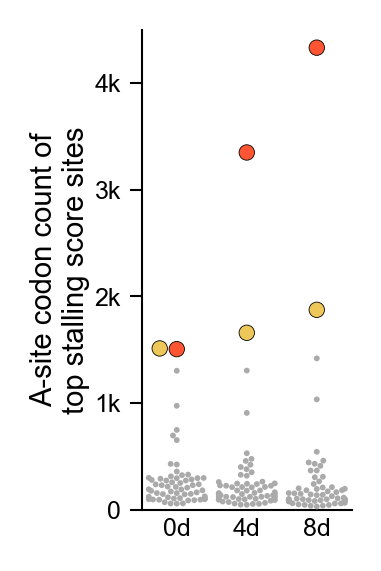

In [4]:
sF = 1 # Size factor
wgap = 0.25
hgap = 0.1
nrow, ncol = 1, 1

width_ratios = [0.7]
height_ratios = [1.6]

fs_w = sum(np.array(width_ratios)*sF) + (ncol-1)*wgap*sF
fs_h = sum(np.array(height_ratios)*sF) + (nrow-1)*hgap*sF

#
fig = plt.figure(figsize=( fs_w, fs_h ), dpi=300)
grid = plt.GridSpec(nrow, ncol,
                    width_ratios=width_ratios,
                    height_ratios=height_ratios,
                    wspace=wgap/np.average(width_ratios), 
                    hspace=hgap/np.average(height_ratios),
                    left=0, right=1, bottom=0, top=1)

row = 0
col = 0
for dataset in ['Ours']:

    plot_data_mark = pd.melt(plot_data_dict[dataset][:2], id_vars='IDX')
    plot_data_else = pd.melt(plot_data_dict[dataset][2:], id_vars='IDX')

    ax = fig.add_subplot(grid[row,col])

    sns.swarmplot(data=plot_data_mark, x="variable", y="value", hue="IDX",
                palette=['#FF5533','#EEC759'], 
                size=3.7, linewidth=0.2, edgecolor='k',
                legend=False)
    sns.swarmplot(data=plot_data_else, x="variable", y="value", hue="IDX",
                palette=['#AAAAAA'], 
                size=1.4,
                legend=False)
    
    ax.set_ylim(0, 4500)
    ax.set_yticks([0, 1000, 2000, 3000, 4000])
    ax.set_yticklabels([0, '1k', '2k', '3k', '4k'])
    ax.tick_params(width=0.5, length=3, pad=2)
    ax.tick_params(axis='x', length=0)

    ax.set_xlabel('')
    ax.set_ylabel('A-site codon count of\ntop stalling score sites', labelpad=1)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    # ax.spines['bottom'].set_visible(False)
    # ax.spines['left'].set_visible(False)

    col+=1

plt.savefig('adi_top5pct_stalling-score_codon-count_swarm.pdf', bbox_inches='tight')
plt.show()
plt.close()